<a href="https://colab.research.google.com/github/ayushrathod04/MACHINE_LEARNING/blob/main/intershipday11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

In [ ]:
loan_df = pd.read_csv('/content/loan_dataset - loan_dataset.csv')

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_df.shape

(614, 13)

In [ ]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
loan_df= loan_df.dropna()

In [ ]:
loan_df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_df.replace({"Loan_Status":{'Y':1,'N':0}},inplace=True)

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
loan_df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [ ]:
from os import replace
loan_df = loan_df.replace(to_replace='3+',value=4)

In [ ]:
loan_df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

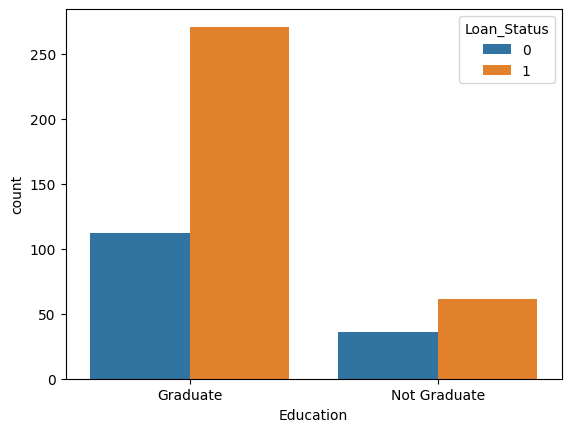

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_df)

<Axes: xlabel='Married', ylabel='count'>

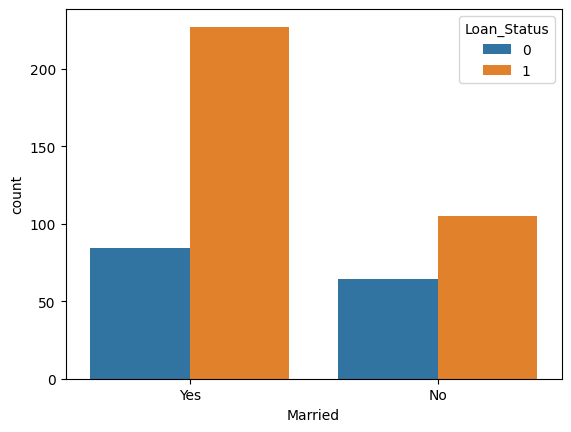

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_df)

In [ ]:
loan_df1 = loan_df.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},
                            'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                            'Education':{'Graduate':1,'Not Graduate':0}})

In [ ]:
print(loan_df1)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
5    LP001011       1        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1          4          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

In [ ]:
x= loan_df1.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_df1['Loan_Status']

In [ ]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  0.7986111111111112


In [ ]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print('Accuracy on test data : ',test_data_accuracy)

Accuracy on test data :  0.8333333333333334


In [ ]:
input_data = (1,1,1,1,0,3074,0.0,66.0,360.0,1.0,2)

In [ ]:
input_data_as_numpy_array = np.asarray(input_data)

In [ ]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
climet=pd.read_csv('/content/weather_classification_data - weather_classification_data.csv')

In [ ]:
climet.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
climet.shape


(13200, 11)

In [ ]:
climet.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [ ]:
climet.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
climet = climet.dropna()

In [ ]:
label_encoder = LabelEncoder()
climet['Humidity'] = label_encoder.fit_transform(climet['Humidity'])

In [ ]:
features = ['Temperature', 'Humidity', 'Wind Speed']
target = 'Temperature'


In [ ]:
X = climet[features]
y = climet[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.14924242424242423


In [ ]:
inputdata = (1,1,1,1,0,3074,0.0,66.0,360.0,1.0,2)

In [ ]:
inputdata = np.asarray(inputdata)

In [ ]:
inputdata = inputdata.reshape(1,-1)

In [ ]:
classifier.predict(inputdata)
print(classifier.predict(inputdata))

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
print (X_train , y_train)
print (X_test , y_test)
print (y_pred)


       Temperature  Humidity  Wind Speed
3958            32        46         6.0
2239            15        76        11.0
3608            28        38         6.5
6848            47        64        44.5
6119            18        46        14.0
...            ...       ...         ...
11964           32        78         5.5
5191            41        59        14.0
5390            34        32         7.0
860              9        53        10.0
7270            11        75         5.5

[10560 rows x 3 columns] 3958     32
2239     15
3608     28
6848     47
6119     18
         ..
11964    32
5191     41
5390     34
860       9
7270     11
Name: Temperature, Length: 10560, dtype: int64
       Temperature  Humidity  Wind Speed
4111            23        18         4.5
10607           62        74        14.5
7372            40        31         2.0
11786           -7        59         6.5
12227           21        74        10.0
...            ...       ...         ...
2543            

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.14924242424242423


<Axes: xlabel='Humidity', ylabel='count'>

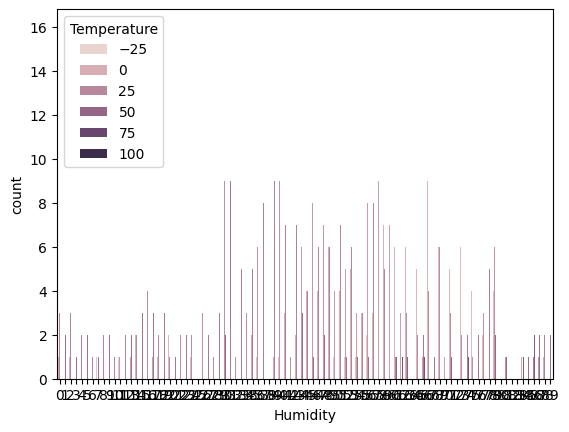

In [ ]:
sns.countplot(x='Humidity',hue='Temperature',data=climet)